In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../../04_merging_dataframes/data/gapminder_total.csv')

In [5]:
df

,continent,country,year,life expectancy,fertility,population
0,Africa,Algeria,1950,43.0,7.65,8872247.0
1,Africa,Algeria,1951,43.0,7.65,9039913.0
2,Africa,Algeria,1952,44.0,7.65,9216395.0
3,Africa,Algeria,1953,44.0,7.65,9405445.0
4,Africa,Algeria,1954,44.0,7.65,9609507.0
...,...,...,...,...,...,...
11083,South America,Venezuela,2011,75.0,2.44,29427631.0
11084,South America,Venezuela,2012,75.0,2.42,29854238.0
11085,South America,Venezuela,2013,75.0,2.39,30276045.0
11086,South America,Venezuela,2014,75.0,2.36,30693827.0


In [4]:
df['population'] = df['population'].astype(int)

In [5]:
df.head()

,continent,country,year,life expectancy,fertility,population
0,Africa,Algeria,1950,43.0,7.65,8872247
1,Africa,Algeria,1951,43.0,7.65,9039913
2,Africa,Algeria,1952,44.0,7.65,9216395
3,Africa,Algeria,1953,44.0,7.65,9405445
4,Africa,Algeria,1954,44.0,7.65,9609507


## ITALY ONLY 

In [28]:
boolean_mask_germany = df['country'] == 'Germany'

In [29]:
boolean_mask_italy = df['country'] =='Italy'
df_italy = df[boolean_mask_italy]
df_italy.describe()

,year,life expectancy,fertility,population
count,66.000000,66.000000,66.000000,6.600000e+01
mean,1982.500000,74.833333,1.804242,5.494900e+07
std,19.196354,5.021748,0.508561,3.837748e+06
min,1950.000000,65.000000,1.210000,4.659860e+07
25%,1966.250000,71.000000,1.322500,5.216876e+07
50%,1982.500000,75.000000,1.545000,5.668540e+07
75%,1998.750000,79.000000,2.337500,5.711989e+07
max,2015.000000,82.000000,2.520000,5.979768e+07


In [30]:
boolean_mask_1950 = df_italy['year'] ==1950
df_italy_1950 = df_italy[boolean_mask_1950]
df_italy_1950

,continent,country,year,life expectancy,fertility,population
7194,Europe,Italy,1950,66.0,2.45,46598602.0


In [38]:
for year in range(1960, 2016):
    boolean_mask = df_italy['year'] == year
    df_subset_italy = df_italy[boolean_mask]
    
    plt.subplots(figsize=(12,7))
    sns.scatterplot(x='life expectancy', y='fertility', hue = 'continent',
                palette = 'nipy_spectral', s = 150 , alpha = 0.5,
                data = df_subset_italy);

    plt.title(f"Life expectancy vs Fertility Rate in Italy {year}", size=18, color="darkblue");
    plt.ylabel('Fertility', color = 'darkblue');
    plt.xlabel('Life Expectancy', color = 'darkblue');
    #plt.legend(loc='upper left'); # move the legend - no frame

    plt.axis([0, 85, 0, 9.5]); # axis start from 0 
    plt.xticks(rotation=45); # labels are rotated 

   # plt.annotate('Germany',(df_subset[df_subset['country']=='Germany']['life expectancy'],  # x
                   #    df_subset[df_subset['country']=='Germany']['fertility']+0.25)); #y

   # plt.annotate('Italy',(df_subset[df_subset['country']=='Italy']['life expectancy'],  # x
                   #    df_subset[df_subset['country']=='Italy']['fertility']+0.25)); #y

    # add grid lines 
    plt.grid(color = 'grey') 
    plt.savefig(f'../data/italy - gif/plot_italy_{year}.png')

    plt.close()

In [39]:
import imageio

In [41]:
images = []

for year in range(1960, 2016):
    path = f'../data/italy - gif/plot_italy_{year}.png'
    images.append(imageio.imread(path))

imageio.mimsave('./italy_gif.gif', images, fps=20)

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/3759214587.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path))


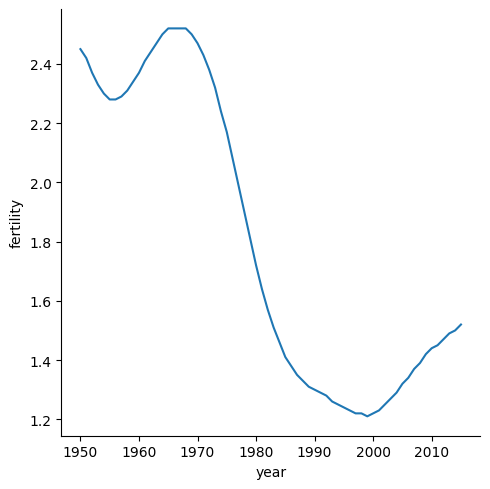

In [22]:
sns.relplot(x='year', y='fertility', 
            kind='line', data=df_italy);

## EUROPE

In [19]:
boolean_mask_europe = df['continent'] == 'Europe'
df_europe = df[boolean_mask_europe]
df_europe.head()

,continent,country,year,life expectancy,fertility,population
5808,Europe,Albania,1950,54.0,5.80,1263171.0
5809,Europe,Albania,1951,55.0,5.90,1287499.0
5810,Europe,Albania,1952,55.0,6.07,1316086.0
5811,Europe,Albania,1953,56.0,6.21,1348097.0
5812,Europe,Albania,1954,57.0,6.31,1382881.0


In [20]:
boolean_mask_1950 = df_europe['year'] ==1950
df_europe_1950 = df_europe[boolean_mask_1950]
df_europe_1950.head()

,continent,country,year,life expectancy,fertility,population
5808,Europe,Albania,1950,54.0,5.80,1263171.0
5874,Europe,Armenia,1950,62.0,4.53,1353506.0
5940,Europe,Austria,1950,65.0,1.87,6936445.0
6006,Europe,Azerbaijan,1950,57.0,5.64,2895997.0
6072,Europe,Belarus,1950,65.0,2.53,7745003.0


/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/939241467.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',


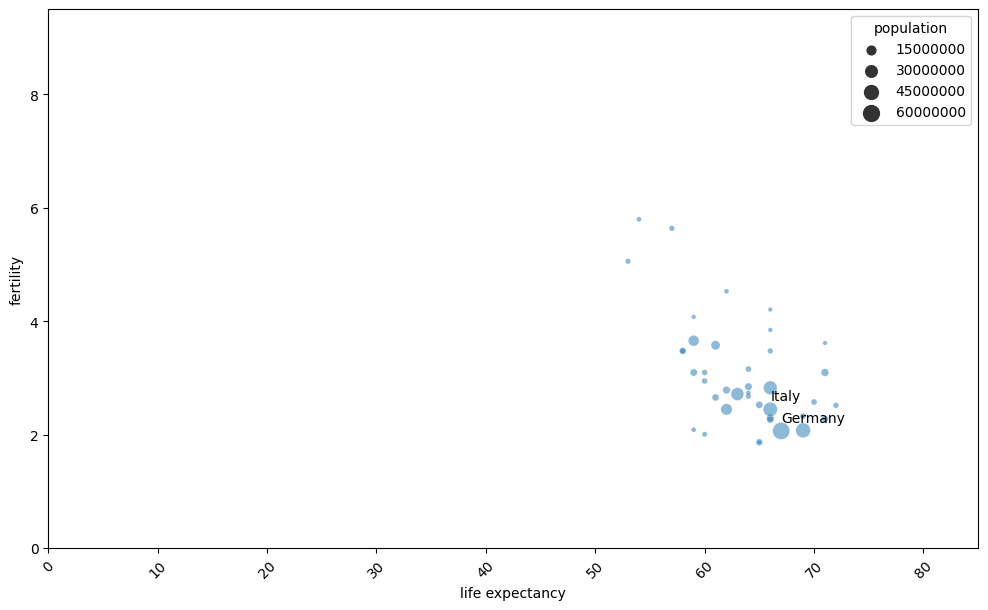

In [21]:
plt.figure(figsize=(12,7))  # the size comes from plt
sns.scatterplot(x='life expectancy', y='fertility', 
                palette = 'nipy_spectral', size = 'population', sizes = (10, 150), alpha = 0.5, 
                data = df_europe_1950);
plt.axis([0, 85, 0, 9.5]); # axis start from 0 
plt.xticks(rotation=45); # labels are rotated 

plt.annotate('Italy',(df_europe_1950[df_europe_1950['country']=='Italy']['life expectancy'],  # x
                       df_europe_1950[df_europe_1950['country']=='Italy']['fertility']+0.15)); #y

plt.annotate('Germany',(df_europe_1950[df_europe_1950['country']=='Germany']['life expectancy'],  # x
                       df_europe_1950[df_europe_1950['country']=='Germany']['fertility']+0.15) ); #y


In [88]:
for year in range(1960,2016): 
    boolean_mask = df_europe['year'] == year
    df_subset_europe = df_europe[boolean_mask]
    
    plt.figure(figsize=(12,7))  # the size comes from plt
    sns.scatterplot(x='life expectancy', y='fertility', 
                    palette = 'nipy_spectral', size = 'population', sizes = (10, 150), alpha = 0.5, 
                    data = df_subset_europe);
    
    plt.axis([0, 85, 0, 9.5]); # axis start from 0 
    plt.xticks(rotation=45); # labels are rotated 
    
    plt.title(f"Life expectancy vs Fertility Rate in Europe {year}", size=18, color="darkblue");
    plt.ylabel('Fertility', color = 'darkblue');
    plt.xlabel('Life Expectancy', color = 'darkblue');

    plt.annotate('Italy',(df_subset_europe[df_subset_europe['country']=='Italy']['life expectancy'],  # x
                         df_subset_europe[df_subset_europe['country']=='Italy']['fertility']+0.15)); #y

    plt.annotate('Germany',(df_subset_europe[df_subset_europe['country']=='Germany']['life expectancy'],  # x
                            df_subset_europe[df_subset_europe['country']=='Germany']['fertility']+0.15) ); #y 

    plt.grid(color = 'grey') 
    plt.savefig(f'../data/europe-gif/plot_europe_{year}.png')

    plt.close()

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assi

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/464182452.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assi

In [8]:
import imageio

In [89]:
images = []

for year in range(1960, 2015):
    path = f'../data/europe-gif/plot_europe_{year}.png'
    images.append(imageio.imread(path))

imageio.mimsave('./europe_gif.gif', images, fps=20)

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_15719/2348944146.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path))


In [91]:
# create a variable for the max fertility rate 
max_fer = df_subset_europe['fertility'].max()

In [31]:
for year in range(1960,2016): 
    boolean_mask = df_europe['year'] == year
    df_subset_europe = df_europe[boolean_mask]
    
    plt.figure(figsize=(12,7))  # the size comes from plt
    sns.scatterplot(x='life expectancy', y='fertility', 
                    palette = 'nipy_spectral', size = 'population', sizes = (10, 150), alpha = 0.5, 
                    data = df_subset_europe);
    
    sns.scatterplot(x='life expectancy', y='fertility', 
                    palette = 'purple', size = 50,
                    data = df_subset_europe[boolean_mask_italy]);

    sns.scatterplot(x='life expectancy', y='fertility', 
                    palette = 'red', size = 50,
                    data = df_subset_europe[boolean_mask_germany]);
    
    plt.axis([20, 85, 0, 7]); # axis start from 0 
    plt.xticks(rotation=45); # labels are rotated 
    
    plt.title(f"Life expectancy vs Fertility Rate in Europe {year}", size=18, color="darkblue");
    plt.ylabel('Fertility', color = 'darkblue');
    plt.xlabel('Life Expectancy', color = 'darkblue');

   # annotate max fertility 
    max_fer = df_subset_europe['fertility'].max()
    plt.annotate(max_fer,(df_subset_europe[df_subset_europe['fertility']==max_fer]['life expectancy'].iloc[0],  # x
                         df_subset_europe[df_subset_europe['fertility']==max_fer]['fertility'].iloc[0] +1)); #y
                     
    # annotate min fertility 
    min_fer = df_subset_europe['fertility'].min()
    plt.annotate(min_fer,(df_subset_europe[df_subset_europe['fertility']==min_fer]['life expectancy'].iloc[0],  # x
                         df_subset_europe[df_subset_europe['fertility']==min_fer]['fertility'].iloc[0] -1)); #y
    
    plt.annotate('Italy',(df_subset_europe[df_subset_europe['country']=='Italy']['life expectancy'],  # x
                          df_subset_europe[df_subset_europe['country']=='Italy']['fertility']+0.15)); #y

    plt.annotate('Germany',(df_subset_europe[df_subset_europe['country']=='Germany']['life expectancy'],  # x
                            df_subset_europe[df_subset_europe['country']=='Germany']['fertility']+0.15) ); #y 

    plt.grid(color = 'grey') 
    plt.savefig(f'../data/fertility_gif/plot_europe_2_{year}.png')

    plt.close()

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_italy]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_germany]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_italy]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_germany]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_italy]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_germany]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_italy]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_germany]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_italy]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_germany]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_italy]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_germany]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_italy]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life expectancy', y='fertility',
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df_subset_europe[boolean_mask_germany]);
/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/263306634.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

In [32]:
images = []

for year in range(1960, 2015):
    path = f'../data/fertility_gif/plot_europe_2_{year}.png'
    images.append(imageio.imread(path))

imageio.mimsave('./fertility_gif.gif', images, fps=20, duration = 0.20)

/var/folders/33/6_3s22415y18bgznpc1317_40000gp/T/ipykernel_17668/2090971576.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path))


In [10]:
boolean_mask = df_europe['year'] == 1997
df_subset_europe = df_europe[boolean_mask]
    
plt.figure(figsize=(12,7))  # the size comes from plt
sns.scatterplot(x='life expectancy', y='fertility', 
                palette = 'nipy_spectral', size = 'population', sizes = (10, 150), alpha = 0.5, 
                data = df_subset_europe);

sns.scatterplot(x='life expectancy', y='fertility', 
                palette = 'purple', size = 50,
                data = df_subset_europe[boolean_mask_italy]);

sns.scatterplot(x='life expectancy', y='fertility', 
                palette = 'red', size = 50,
                data = df_subset_europe[boolean_mask_germany]);

plt.axis([0, 85, 0, 9.5]); # axis start from 0 
plt.xticks(rotation=45); # labels are rotated 
    
plt.title(f"Life expectancy vs Fertility Rate in Europe {year}", size=18, color="darkblue");
plt.ylabel('Fertility', color = 'darkblue');
plt.xlabel('Life Expectancy', color = 'darkblue');

   # annotate max fertility 
max_fer = df_subset_europe['fertility'].max()
plt.annotate(max_fer,(df_subset_europe[df_subset_europe['fertility']==max_fer]['life expectancy'].iloc[0],  # x
                         df_subset_europe[df_subset_europe['fertility']==max_fer]['fertility'].iloc[0] +1)); #y
                     
    # annotate min fertility 
min_fer = df_subset_europe['fertility'].min()
plt.annotate(min_fer,(df_subset_europe[df_subset_europe['fertility']==min_fer]['life expectancy'].iloc[0],  # x
                      df_subset_europe[df_subset_europe['fertility']==min_fer]['fertility'].iloc[0] -1)); #y
    
plt.annotate('Italy',(df_subset_europe[df_subset_europe['country']=='Italy']['life expectancy'],  # x
                      df_subset_europe[df_subset_europe['country']=='Italy']['fertility']+0.15)); #y

plt.annotate('Germany',(df_subset_europe[df_subset_europe['country']=='Germany']['life expectancy'],  # x
                        df_subset_europe[df_subset_europe['country']=='Germany']['fertility']+0.15) ); #y 

plt.grid(color = 'grey') 

NameError: name 'df_europe' is not defined

## Spain - Italy - Germany 

In [11]:
boolean_mask = (df['country'] == 'Spain') | (df['country'] == 'Italy')| (df['country'] == 'Germany')
df_pill = df[boolean_mask]
df_pill

,continent,country,year,life expectancy,fertility,population
6864,Europe,Germany,1950,67.0,2.07,69786246.0
6865,Europe,Germany,1951,67.0,2.08,70111671.0
6866,Europe,Germany,1952,67.0,2.11,70421462.0
6867,Europe,Germany,1953,68.0,2.14,70720721.0
6868,Europe,Germany,1954,68.0,2.17,71015688.0
...,...,...,...,...,...,...
8179,Europe,Spain,2011,82.0,1.47,46708366.0
8180,Europe,Spain,2012,82.0,1.49,46637082.0
8181,Europe,Spain,2013,82.0,1.51,46455163.0
8182,Europe,Spain,2014,82.0,1.52,46259716.0


<Figure size 1000x500 with 0 Axes>

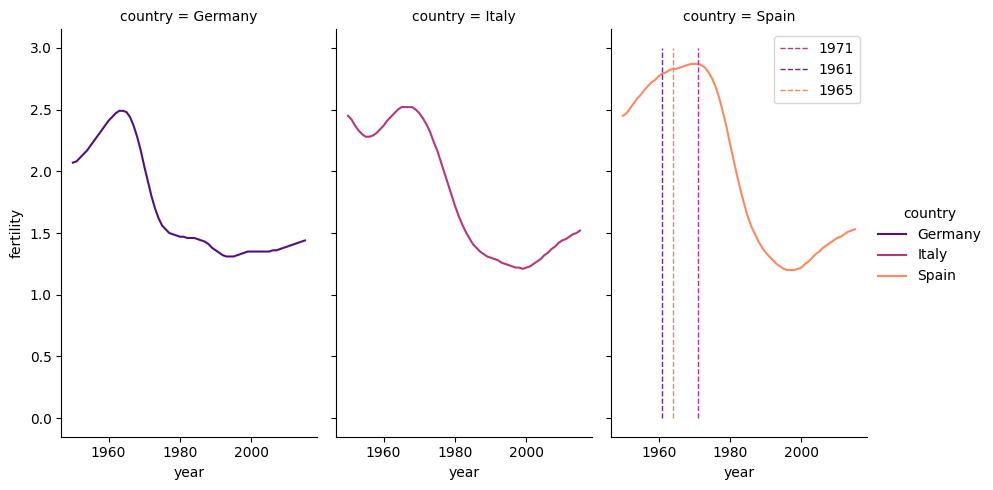

In [34]:
plt.figure(figsize=(10,5));

sns.relplot(x='year', y='fertility', 
            kind='line', data=df_pill, hue = 'country', palette = 'magma',
           col = 'country', height = 5, aspect = 0.6);


plt.vlines(1971, 0 , 3, color= '#B7387A', linewidth = 1, label = '1971', linestyles='dashed'); # italy
plt.vlines(1961, 0 , 3, color= '#642C8B', linewidth = 1 ,label = '1961', linestyles='dashed'); # germany
plt.vlines(1964, 0 , 3, color= '#F18860', linewidth = 1, label = '1965',linestyles='dashed' ); # spain


# plt.title('Fertility Rate over 65 years', size=18, color="Purple");

plt.ylabel('Fertility', color = 'Purple');

plt.legend(loc='upper right'); # move the legend - no frame 
# label = ['Germany', 'Italy', 'Spain', '1971', '1961', '1964']


<Figure size 1200x500 with 0 Axes>

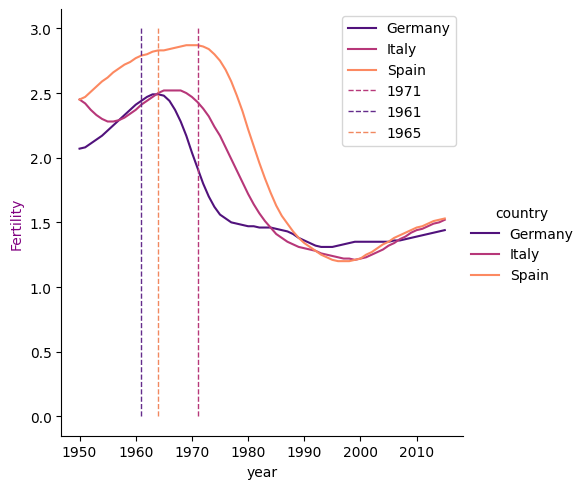

In [17]:
plt.figure(figsize=(12,5));
sns.relplot(x='year', y='fertility', 
            kind='line', data=df_pill, hue = 'country', palette = 'magma');


plt.vlines(1971, 0 , 3, color= '#B7387A', linewidth = 1, label = '1971', linestyles='dashed'); # italy
plt.vlines(1961, 0 , 3, color= '#642C8B', linewidth = 1 ,label = '1961', linestyles='dashed'); # germany
plt.vlines(1964, 0 , 3, color= '#F18860', linewidth = 1, label = '1965',linestyles='dashed' ); # spain


# plt.title('Fertility Rate over 65 years', size=18, color="Purple");

plt.ylabel('Fertility', color = 'Purple');

plt.legend(loc='upper right'); # move the legend - no frame 
# label = ['Germany', 'Italy', 'Spain', '1971', '1961', '1964']


AttributeError: module 'seaborn' has no attribute 'set_axis_labels'

<Figure size 1200x500 with 0 Axes>

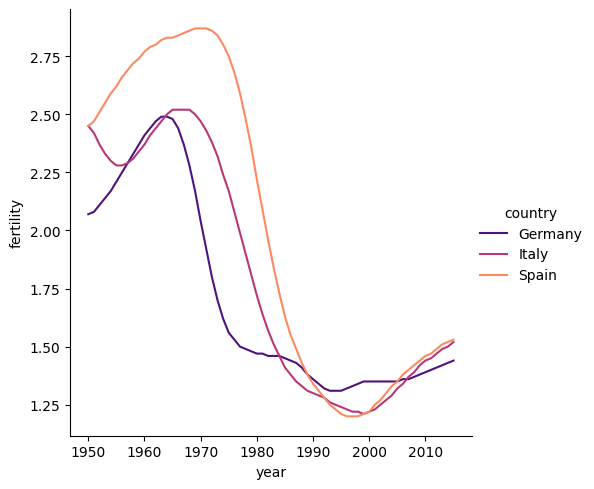

In [37]:
g = plt.figure(figsize=(12,5));
sns.relplot(x='year', y='fertility', 
            kind='line', data=df_pill, hue = 'country', palette = 'magma')

sns.set_axis_labels("years", "fertility rate")
sns.set_titles("Country: {col_name}")
sns.tight_layout(w_pad=0))

## Results

#### Spain

- contraception pill introduced in 1964 during Franco dictatorship.
- Fer continued being positive also after the legalisation of the pill
- 1975 death of Franco and end of dictatorship
- Fer dropped around 1975

#### Italy 
- contraception pill introduced in 1971
- drop started before in 1968 
- 1968 student revolution, feminism, women emancipation 

#### Germany 
- contraception pill introduced in 1961
- drop started later around 1968, with the student and feminist revolution 